# Homework 3 by Oskar Chen

## 1a

$$w \cdot (0.55) + (1-w) \cdot (0.46) = 0.47$$
$$0.55w + 0.46 -0.46w = 0.47$$
$$0.09w = 0.01$$
$$w = 1/9$$

1/9 of investors must be skilled.

## 1b

$$P(skilled|beat) = \frac{P(beat|skilled)P(skilled)}{P(beat)}$$
$$= \frac{0.55 \cdot \frac{1}{9}}{0.47}$$
$$= 0.130024$$

## 1c

$$P(skilled|beat >= 2/3 years) = \frac{P(beat >= 2/3 years|skilled)P(skilled)}{P(beat >= 2/3 years)}$$

First, this is the probability for skilled investors:

$${P(beat >= 2/3 years|skilled)} = P(beat = 2/3 years) + P(beat = 3/3 years)$$
calculate each part:
$$P(beat = 2/3 years) = \frac{3!}{2!} \cdot (0.55)^2 (0.45) = 0.408375$$
and:
$$P(beat = 3/3 years) = (0.55)^3 = 0.166375$$
we get
$${P(beat >= 2/3 years|skilled)} = 0.57475$$

Then, do the same for the unskilled investors:

$${P(beat >= 2/3 years|unskilled)} = P(beat = 2/3 years) + P(beat = 3/3 years)$$
calculating each part:
$$P(beat = 2/3 years) = \frac{3!}{2!} \cdot (0.46)^2 (0.54) = 0.342792$$
and:
$$P(beat = 3/3 years) = (0.46)^3 = 0.097336$$
giving
$${P(beat >= 2/3 years|unskilled)} = 0.440128$$

Therefore, 
$$P(beat >= 2/3 years) = (1/9)(0.57475) + (8/9)(0.440128) = 0.455086$$

Finally, the solution is:

$$P(skilled|beat >= 2/3 years) = \frac{0.57475 \cdot \frac{1}{9}}{0.455086} = 0.140328$$

## 1d

In [2]:
# Import modules
import numpy as np
from scipy.stats import binom

# Generate 1,000,000 skilled investor simulations
skilled_beats = binom.rvs(n = 3, p = 0.55, loc = 0, size = 1_000_000, random_state = 99)

# Calculate probability
skilled_prob = np.mean(skilled_beats >= 2)

# Generate 1,000,000 unskilled investor simulations, and again test probability
unskilled_beats = binom.rvs(n = 3, p = 0.46, loc = 0, size = 1_000_000, random_state = 99)

unskilled_prob = np.mean(unskilled_beats >= 2)

print(f'The probability that a skilled investor beats market '
      f'at least 2/3 years is {skilled_prob:.6f}.')
print(f'The probability that an unskilled investor beats market '
      f'at least 2/3 years is {unskilled_prob:.6f}.')

The probability that a skilled investor beats market at least 2/3 years is 0.575142.
The probability that an unskilled investor beats market at least 2/3 years is 0.439894.


Skilled investor beating the market >= 2/3 years:
$$(1/9)x * 0.575142 = 0.063905$$

Probability of an investor beating the market >= 2/3 years:
$$[\frac{1}{9} \cdot (0.575142) + \frac{8}{9} \cdot (0.439894)] = 0.454922$$

Total investors beating the market >= 2/3 years:
$$0.454922x$$

Ratio of skilled investors who beat the market at least twice in three years,
to the total number of investors who did the same:
$$\frac{0.063905}{0.454922} = 0.140474$$

## 1e

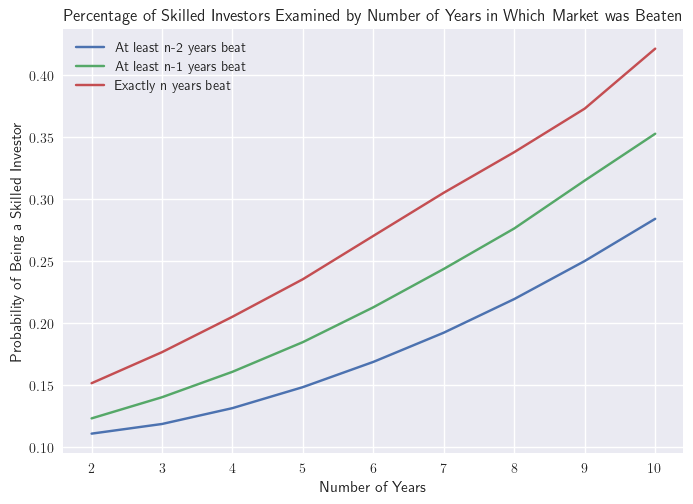

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Use LaTex and increase image resolution
plt.rcParams['text.usetex'] = True

# Use Seaborn style
plt.style.use('seaborn-v0_8')

#Numbers of years in which investor beat the market
years_beat = np.arange(2, 11)

#Empty arrays representing probabilities of being skilled
prob_n_minus_2 = []
prob_n_minus_1 = []
prob_n = []

#Same thing for the probabilities of being unskilled
prob_un_n_minus_2 = []
prob_un_n_minus_1 = []
prob_un_n = []


for year in (years_beat):

    skilled_beats = binom.rvs(n = year, p = 0.55, loc = 0, size = 1_000_000, random_state = 99)
    unskilled_beats = binom.rvs(n = year, p = 0.46, loc = 0, size = 1_000_000, random_state = 99)

    prob_n_minus_2.append(np.mean(skilled_beats >= year -2))
    prob_n_minus_1.append(np.mean(skilled_beats >= year -1))
    prob_n.append(np.mean(skilled_beats == year))

    prob_un_n_minus_2.append(np.mean(unskilled_beats >= year -2))
    prob_un_n_minus_1.append(np.mean(unskilled_beats >= year -1))
    prob_un_n.append(np.mean(unskilled_beats == year))

# Multiplying the percentages by proportion of skilled investors
proportion_skilled = 1/9
prob_total_n_minus_2 = (1/9) * np.array(prob_n_minus_2) + (8/9) * np.array(prob_un_n_minus_2)
prob_total_n_minus_1 = (1/9) * np.array(prob_n_minus_1) + (8/9) * np.array(prob_un_n_minus_1)
prob_total_n = (1/9) * np.array(prob_n) + (8/9) * np.array(prob_un_n)


true_prob_n_minus_2 = np.array(prob_n_minus_2) * proportion_skilled / prob_total_n_minus_2
true_prob_n_minus_1 = np.array(prob_n_minus_1) * proportion_skilled / prob_total_n_minus_1
true_prob_n = np.array(prob_n) * proportion_skilled / prob_total_n

# 3 different plots
plt.plot(years_beat, true_prob_n_minus_2, label='At least n-2 years beat')
plt.plot(years_beat, true_prob_n_minus_1, label='At least n-1 years beat')
plt.plot(years_beat, true_prob_n, label='Exactly n years beat')


# Give plot x, y labels, title, grid, and legend
plt.xlabel('Number of Years')
plt.ylabel('Probability of Being a Skilled Investor')
plt.title('Percentage of Skilled Investors Examined by Number of Years in Which Market was Beaten')
plt.grid(True)
plt.legend()


plt.show()

del prob_n_minus_2, prob_n_minus_1, prob_n
del prob_un_n_minus_2, prob_un_n_minus_1, prob_un_n
del prob_total_n_minus_2, prob_total_n_minus_1, prob_total_n

## 2a

Since $$Y = X_1 + X_2 + ... + X_{12}$$

and follows a normal distribution, the formula for the expected value of Y is:

$$E[Y] = \mu + \mu + ... + \mu = 12\mu$$ 

The formula for the variance is therefore:

$$\mathrm{Var}(Y) = \sigma^2 + \sigma^2 + ... + \sigma^2 = 12\sigma^2$$

## 2b

$$E[R]= \bar{R} = \frac{1}{n} \sum_{i=1}^{n} R_i$$
and
$$\mathrm{Var}(R) = s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (R_i - \bar{R})^2$$
therefore
$$E[R] = \frac{0.1}{3} = \frac{1}{30}$$ 
and
$$\mathrm{Var}(R) = \frac{1}{2} [(\frac{13}{300})^2 + (\frac{2}{75})^2 + 
(\frac{1}{60})^2] =\frac{43}{30000}$$

$$
\mathrm{Var}(R) = \mathrm{Var}(e^{X}) 
= (e^{\sigma^{2}} - 1) e^{2\mu + \sigma^{2}}
$$
and
$$
E[R] = E[e^{X}] - 1 = e^{\mu + \sigma^{2} / 2} - 1
$$

therefore

$$\frac{43}{30000} = (e^{\sigma^2} - 1)e^{2\mu + \sigma^2}$$

and

$$\frac{1}{30} = e^{\mu + \sigma^2 / 2} - 1$$

solving the 2nd equation for mu:

$$\ln\frac{31}{30} = \mu + \sigma^2 / 2 $$
$$\mu = \ln\frac{31}{30} - \sigma^2 / 2 $$

substituting mu into the variance equation:

$$\frac{43}{30000} = (e^{\sigma^{2}} - 1)e^{2 \cdot \ln\frac{31}{30}} 
= (e^{\sigma^{2}} - 1) (\frac{31}{30})^2$$

$$\hat\sigma^2 = 0.0012563557$$

and 

$$\hat{\mu} = 0.032161644$$

$$\text{annualized}\: \hat{\mu} = 0.38593973$$

and

$$\text{annualized}\: \hat{\sigma}^2 = 0.01507627$$

## 2c

$$E[R] = e^{0.38593973 + 0.01507627^{2} / 2} - 1
= 0.471163194935921$$

$$\mathrm{Var}(R) = (e^{0.01507627} - 1) e^{2 * (0.38593973) +
0.01507627} = 0.0333689330881548$$

## 3a

In [24]:
import numpy as np

# data given:
x_vals = np.arange(1, 11)
y_vals = [-1.91, 0.02, 2.05, 4.11, 6.09, 
          8.45, 10.05, 11.99, 13.99, 16.02]

# getting coefficients for linear polynomial, with degree = 1
coefficients = np.polyfit(x_vals, y_vals, deg=1)
alpha = coefficients[1]
beta = coefficients[0]

print(f"a (intercept): {alpha}")
print(f"b (slope): {beta}")

a (intercept): -3.882000000000004
b (slope): 1.9941818181818183


## 3b

In [12]:
# calculate residual using list comprehension
residuals = [y - (alpha + beta * x) 
             for x, y in zip(x_vals, y_vals)]

# use np.std to calculate standard deviation of residuals
# using n-2 since we're estimating 2 parameters and losing 
# 2 degrees of freedom
std_error = np.std(residuals, ddof=2)

print(f"standard error: {std_error}")

standard error: 0.1414422464856555


## 3c

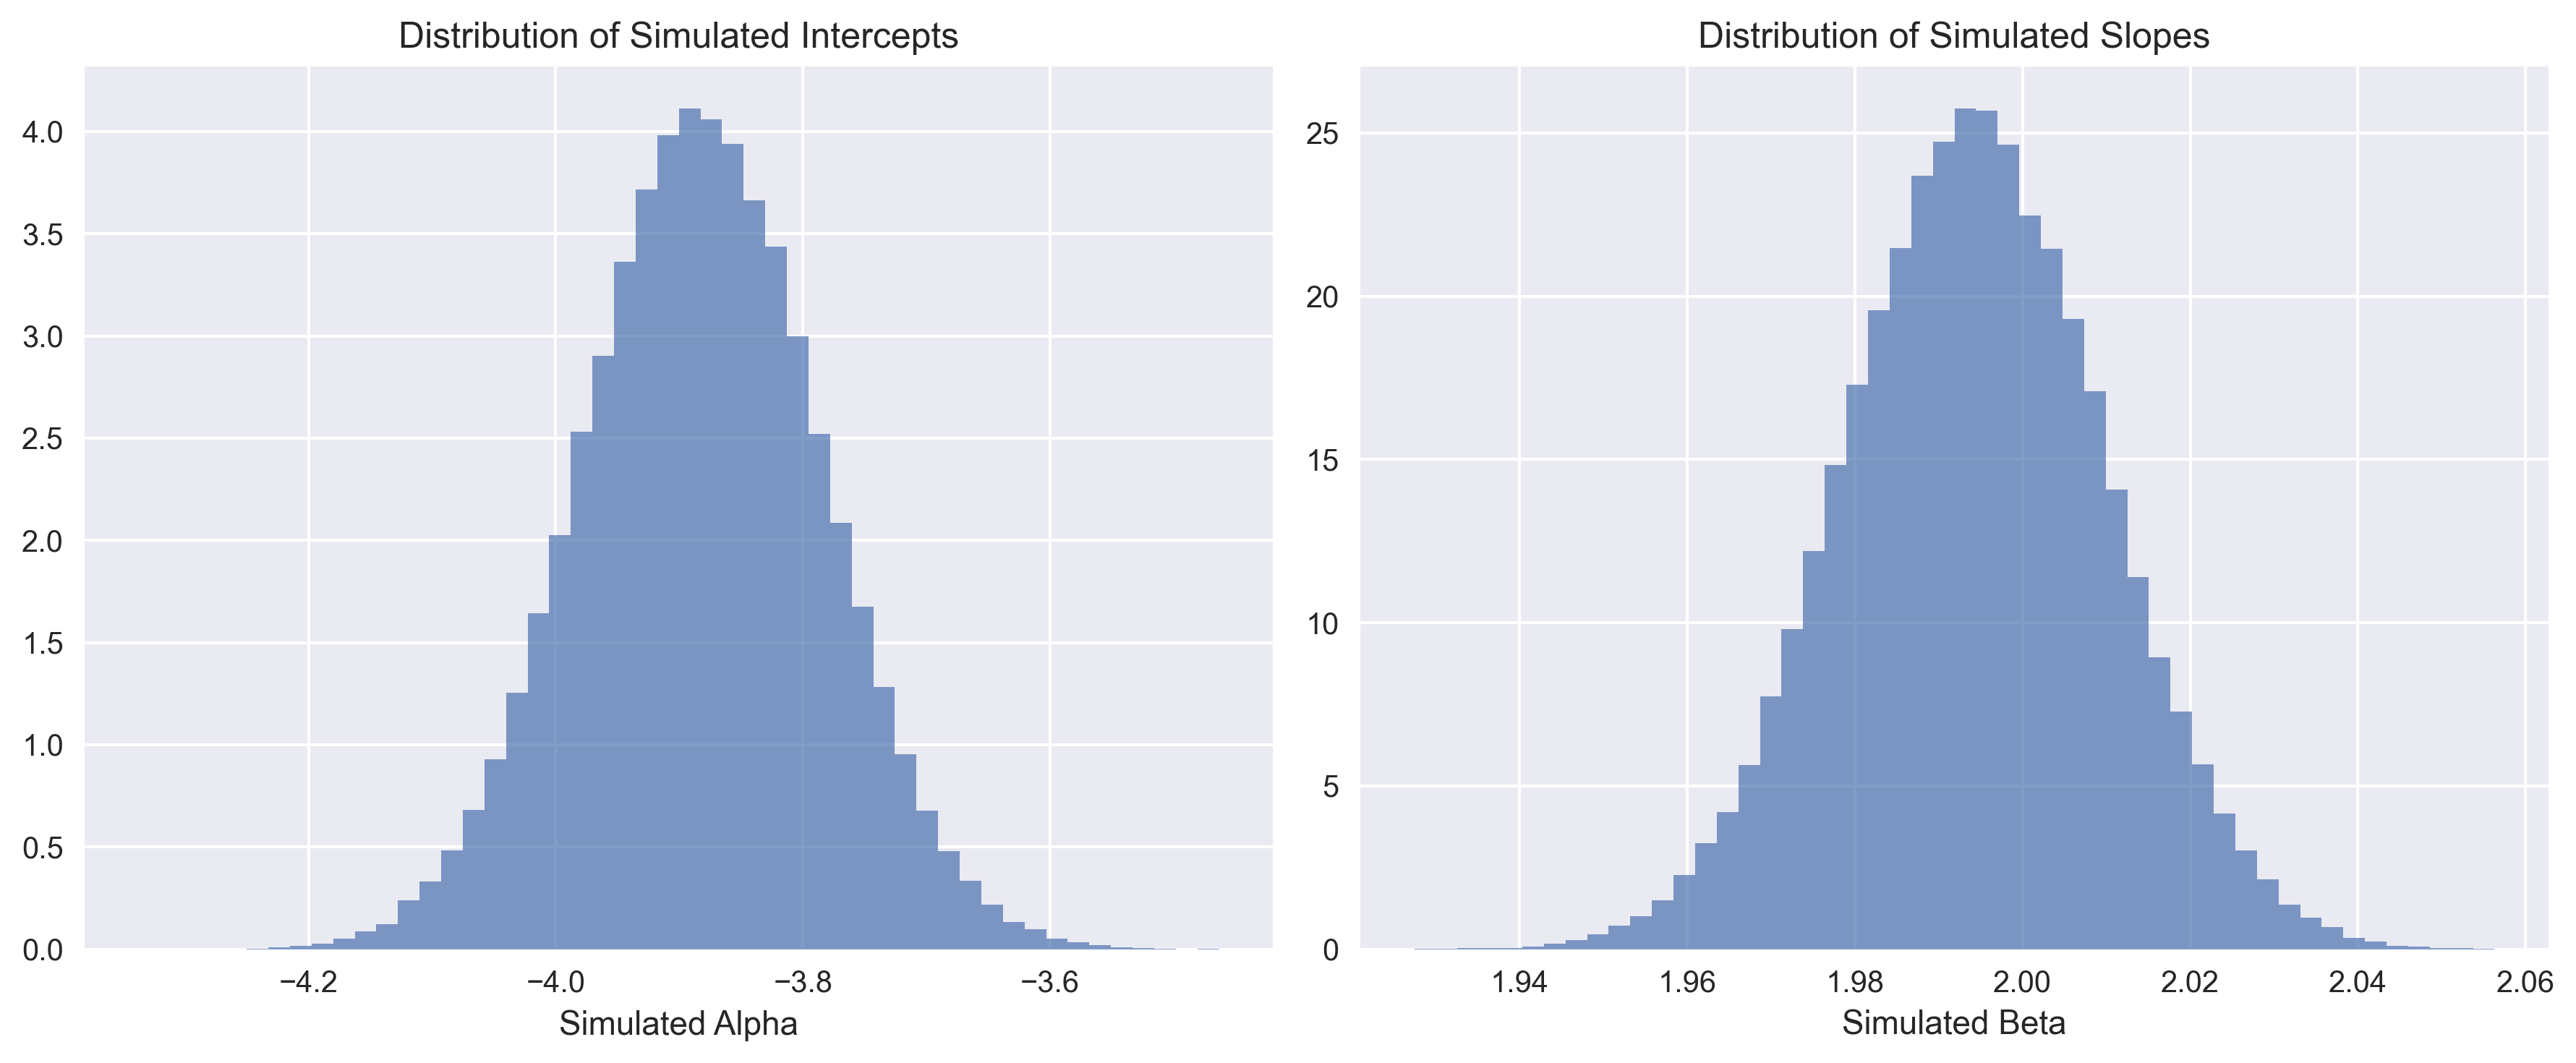

In [21]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

# --- Plotting Setup ---
plt.rcParams['text.usetex'] = False
plt.rcParams['figure.dpi'] = 300

# Using a modern seaborn style
plt.style.use('seaborn-v0_8') 

fig = plt.figure(figsize=(12, 5)) # Overall figure size

# for retraceability
np.random.seed(4)

# list of variables i'm bringing over
# alpha, beta - coefficients
# x_vals, y_vals - given data
# std_error - standard error

# storing simulated alpha, beta
alpha_sim = []
beta_sim = []

for i in range(100_000):
    # approximate errors using norm dist of E_i, mu=0, std.dev= standard error, n=10
    errors = norm.rvs(loc=0, scale=std_error, size=10)

    # calculate value of y using simulated errors
    y_sim = alpha + beta * x_vals + errors

    # linear approximation of alpha, beta, using simulated y
    sim_coeff = np.polyfit(x_vals, y_sim, deg=1)

    alpha_sim.append(sim_coeff[1])
    beta_sim.append(sim_coeff[0])

# graphing 2 histograms, one for alpha tilde and one for beta tilde (approximation - note)

plt.subplot(1, 2, 1)
plt.hist(alpha_sim, bins=50, density=True, alpha=0.7)
plt.xlabel('Simulated Alpha')
plt.title('Distribution of Simulated Intercepts')

plt.subplot(1, 2, 2)
plt.hist(beta_sim, bins=50, density=True, alpha=0.7)
plt.xlabel('Simulated Beta')
plt.title('Distribution of Simulated Slopes')

plt.tight_layout()

# Save the figure
plt.savefig(r'approx_alpha_beta.png')

plt.show()

## 3d

In [26]:
# let alpha level be 10% (90% confidence interval)
alpha_level = 0.1

# formula for confidence intervals, using original estimates
# alpha and beta, then with simulated alpha and beta values
# note: 2a creates a mirror point and subtracts worst
# over/under estimations to account for bias
alpha_lower = 2 * alpha - np.quantile(alpha_sim, 1 - alpha_level/2)
alpha_upper = 2 * alpha - np.quantile(alpha_sim, alpha_level/2)

beta_lower = 2 * beta - np.quantile(beta_sim, 1 - alpha_level/2)
beta_upper = 2 * beta - np.quantile(beta_sim, alpha_level/2)

print(f"90% CI for alpha: ({alpha_lower:.6f}, {alpha_upper:.6f})")
print(f"90% CI for beta: ({beta_lower:.6f}, {beta_upper:.6f})")

90% CI for alpha: (-4.041151, -3.721881)
90% CI for beta: (1.968366, 2.019785)


## 3e

In [35]:
from scipy.stats import t

# creating new variables from given data
x_bar = np.mean(x_vals)
sum_x_diff_sq = np.sum((x_vals - x_bar)**2)

# formula for standard error of coefficients
# not to be confused with std dev. of residuals
se_alpha = std_error * np.sqrt((1/10) + (x_bar)**2 / sum_x_diff_sq)

se_beta = std_error / np.sqrt(sum_x_diff_sq)

# t-critical values: 5th and 95th percentiles, n-2 for degrees of freedom
# they're actually the same inmanitude: t-dist is symmetric
t_lower = t.ppf(alpha_level/2, df = 8)
t_upper = t.ppf(1 - alpha_level/2, df = 8)

# theoretical confidence intervals
alpha_ci_lower = alpha + t_lower * se_alpha
alpha_ci_upper = alpha + t_upper * se_alpha

beta_ci_lower = beta + t_lower * se_beta
beta_ci_upper = beta + t_upper * se_beta

print(f"90% confidence interval for alpha: \
({alpha_ci_lower:.6f}, {alpha_ci_upper:.6f})")

print(f"90% confidence interval for beta: \
({beta_ci_lower:.6f}, {beta_ci_upper:.6f})")

90% confidence interval for alpha: (-4.061676, -3.702324)
90% confidence interval for beta: (1.965224, 2.023139)


## 3f

Very similar to 3c, just changing how errors are generated

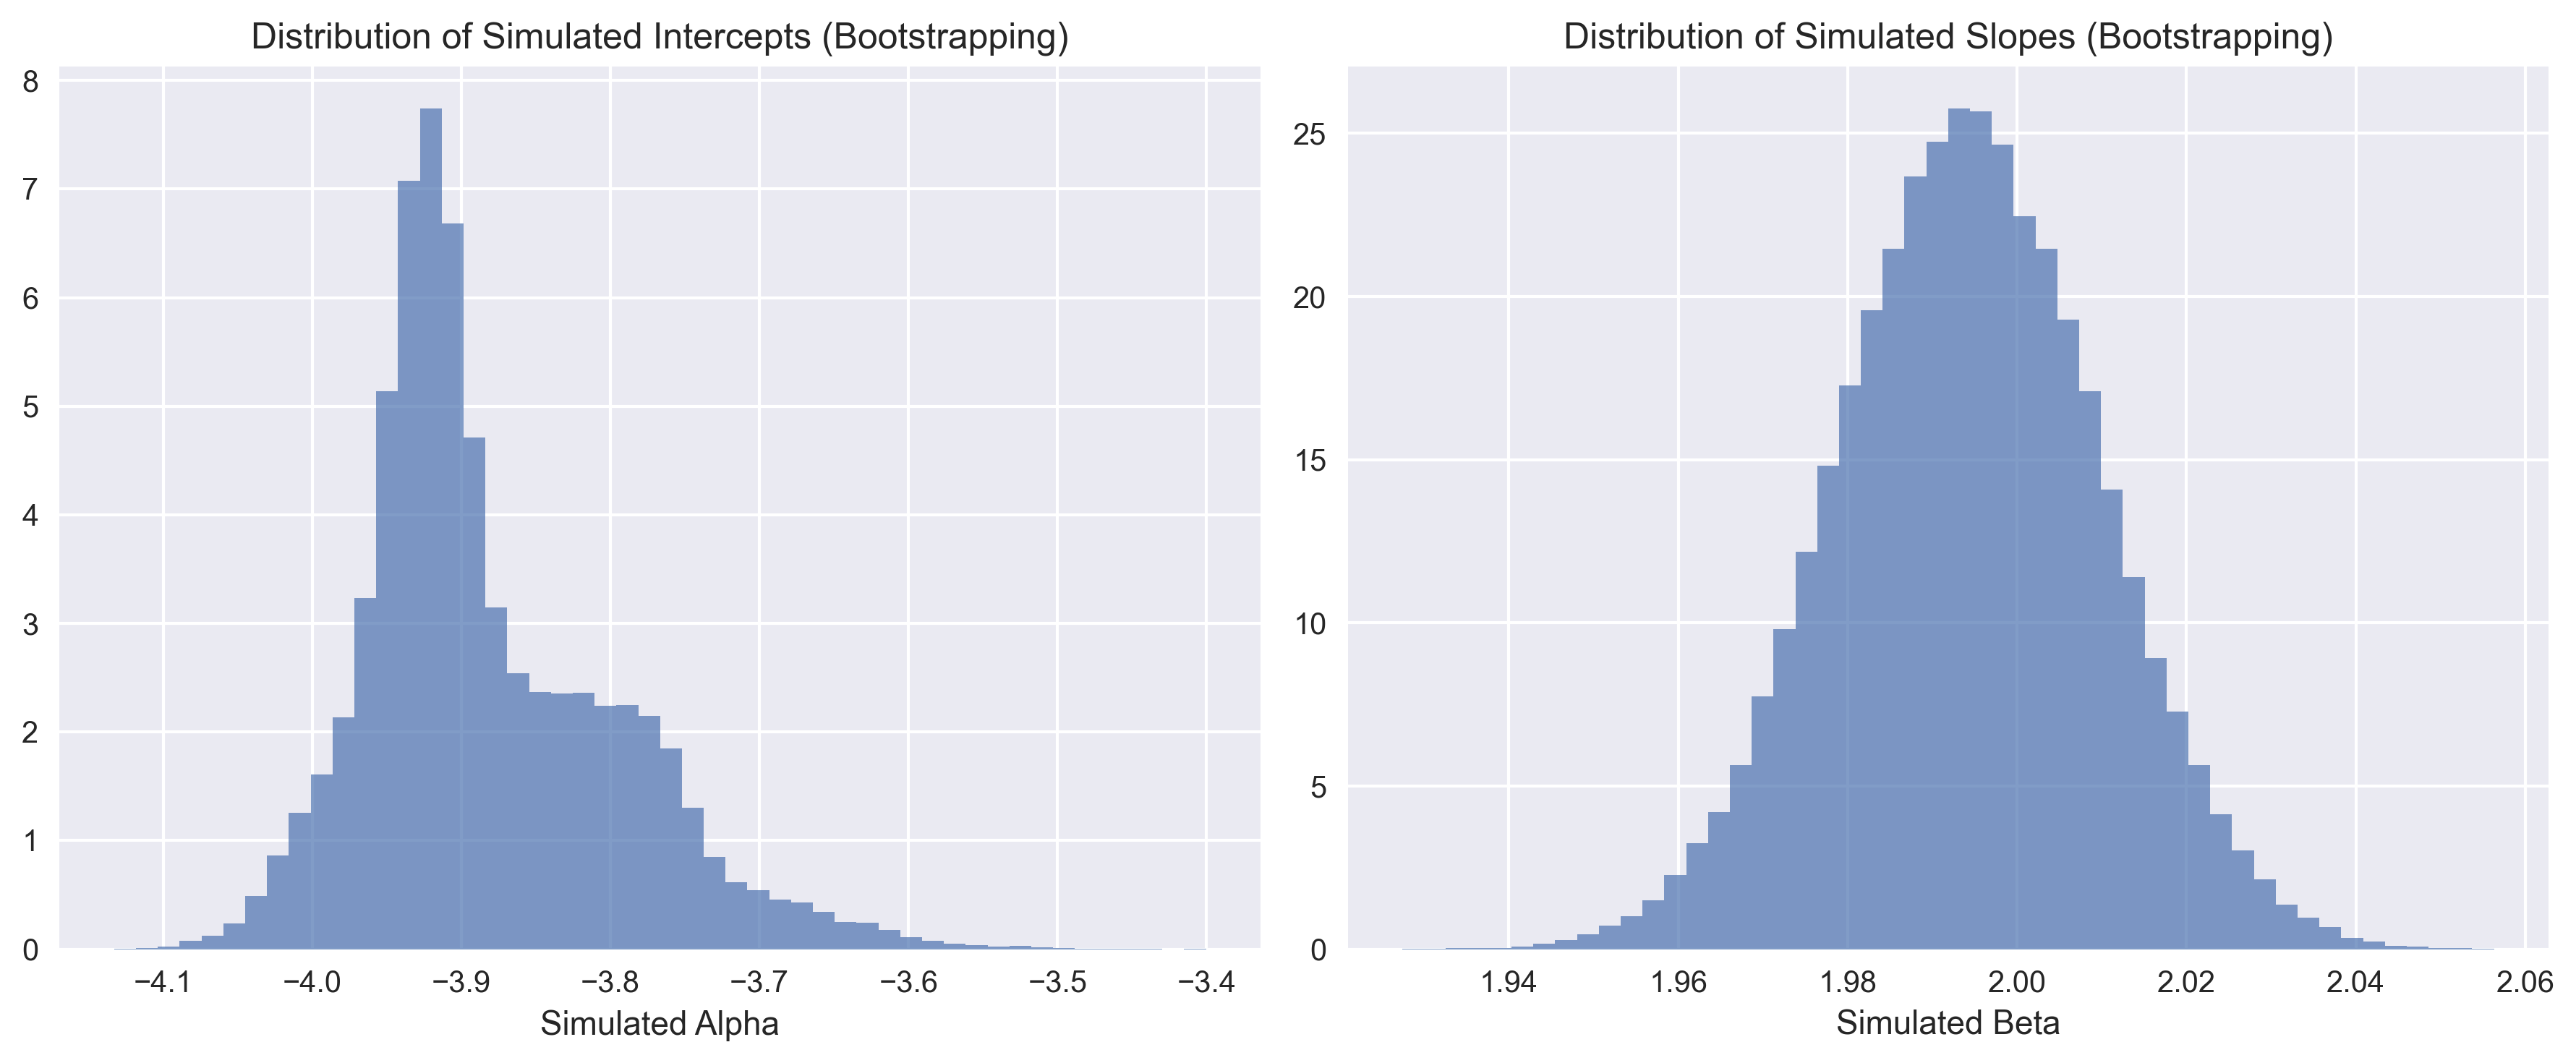

In [43]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

# --- Plotting Setup ---
plt.rcParams['text.usetex'] = False
plt.rcParams['figure.dpi'] = 300

# Using a modern seaborn style
plt.style.use('seaborn-v0_8') 

fig = plt.figure(figsize=(12, 5)) # Overall figure size

# for retraceability - restating again to force a reset
np.random.seed(4)

# storing simulated alpha, beta
alpha_sim_b = []
beta_sim_b = []

for i in range(100_000):
    # approximate errors using bootstrapping method, from residual in
    # part b, note: replacement has to be true for bootstrapping to work
    errors_bootstrap = np.random.choice(residuals , size=10, replace=True)

    # calculate value of y using simulated errors
    y_sim = alpha + beta * x_vals + errors_bootstrap

    # linear approximation of alpha, beta, using simulated y
    sim_coeff = np.polyfit(x_vals, y_sim, deg=1)

    alpha_sim_b.append(sim_coeff[1])
    beta_sim_b.append(sim_coeff[0])

# graphing 2 histograms, one for alpha tilde and one for beta tilde (approximation - note)

plt.subplot(1, 2, 1)
plt.hist(alpha_sim_b, bins=50, density=True, alpha=0.7)
plt.xlabel('Simulated Alpha')
plt.title('Distribution of Simulated Intercepts (Bootstrapping)')

plt.subplot(1, 2, 2)
plt.hist(beta_sim, bins=50, density=True, alpha=0.7)
plt.xlabel('Simulated Beta')
plt.title('Distribution of Simulated Slopes (Bootstrapping)')

plt.tight_layout()

# Save the figure
plt.savefig(r'boot_approx_alpha_beta.png')

plt.show()

## 3g

In [44]:
# let alpha level be 10% (90% confidence interval)
alpha_level = 0.1

# formula for confidence intervals, using bootstrapping method to sample
# otherwise identical to part d
alpha_lower_b = 2 * alpha - np.quantile(alpha_sim_b, 1 - alpha_level/2)
alpha_upper_b = 2 * alpha - np.quantile(alpha_sim_b, alpha_level/2)

beta_lower_b = 2 * beta - np.quantile(beta_sim_b, 1 - alpha_level/2)
beta_upper_b = 2 * beta - np.quantile(beta_sim_b, alpha_level/2)

print(f"90% CI for alpha (bootstrapping): ({alpha_lower_b:.6f}, {alpha_upper_b:.6f})")
print(f"90% CI for beta (bootstrapping): ({beta_lower_b:.6f}, {beta_upper_b:.6f})")

90% CI for alpha (bootstrapping): (-4.041855, -3.766339)
90% CI for beta (bootstrapping): (1.970718, 2.017665)
